# Random Forest pour des images

Le principal objectif est d’implémenter une méthode de reconnaissance des chiffres écrits à la mains grâce à un modèle Random Forest (RF). 

In [1]:
import matplotlib
import numpy as np # Pour la manipulation de tableaux

import matplotlib.pyplot as plt  # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur

from sklearn.model_selection import train_test_split # Pour répartir les données
from sklearn.model_selection import GridSearchCV, cross_val_score # Pour évaluer un modèle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Pour les performances de classification

from tensorflow.keras.datasets.mnist import load_data # Pour charger le dataset MNIST
from sklearn.ensemble import RandomForestClassifier # Pour instancier et entraîner un modèle Random Forest

import itertools # Pour créer des itérateurs

In [2]:
# Pour importer le datasets mnist de Keras
from tensorflow.keras.datasets.mnist import load_data

# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = load_data()

# Changer la forme de X_train et X_test
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:',y_train.shape)


11490434/11490434 [==============================] - 1s 0us/step
Shape of X: (60000, 784)
Shape of y: (60000,)


In [3]:
# Instanciation d'un modele Random Forest
model = RandomForestClassifier(n_jobs=-1)

# Entraînement du modèle
model.fit(X_train, y_train);

In [5]:
# Prédiction sur l'échantillon de test
test_pred = model.predict(X_test)

# On évalue le niveau de précision de notre prédiction.
print("Précision de la prédiction:", accuracy_score(y_test, test_pred)*100, '%')


Précision de la prédiction: 96.99 %


In [6]:
print("Evaluation détaillée de la Classification par RDF :\n \n" ,
      (classification_report(y_test, test_pred)))

# On observe que les chiffres 0, 1 et 6 ont le meilleur rappel (recall), tandis que le chiffre 1 a la meilleure précision.
# Le F1-score, qui calcule la moyenne harmonique de la précision et du rappel, est un bon indicateur lorsqu'on cherche à prendre
# en compte ces deux mesures.


Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



[[ 970    0    1    0    0    2    1    1    4    1]
 [   0 1125    2    1    0    3    2    0    1    1]
 [   8    0  999    4    3    0    3    9    6    0]
 [   1    0   10  972    0    6    0    9    8    4]
 [   1    0    3    0  956    0    4    1    2   15]
 [   3    1    0   18    1  858    4    1    4    2]
 [   6    3    0    0    3    2  941    0    3    0]
 [   1    2   19    2    0    0    0  990    2   12]
 [   6    0    4    5    4    5    7    4  929   10]
 [   6    5    2    8   11    4    1    6    7  959]]


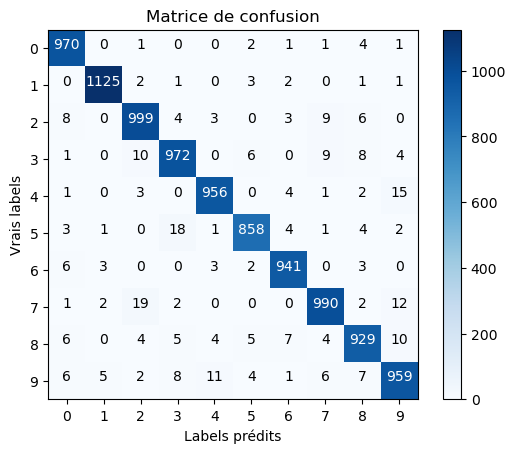

Le chiffre 5 a souvent été pris pour le chiffre 3
Le chiffre 7 a souvent été pris pour le chiffre 2


In [7]:
#Réponse valable:
cnf_matrix = confusion_matrix(y_test, test_pred)
print(cnf_matrix)

###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
classes = range(0,10)

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

#####

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    if(cnf_matrix[i,j] >15 and i!=j):
        print("Le chiffre {0} a souvent été pris pour le chiffre {1}".format(i,j))


Une manière efficace de parcourir un tableau à deux dimensions est d’utiliser le module itertools,  en particulier ici avec la fonction ‘produc’ qui renvoi toutes les paires du produit cartésien de deux séquences. 

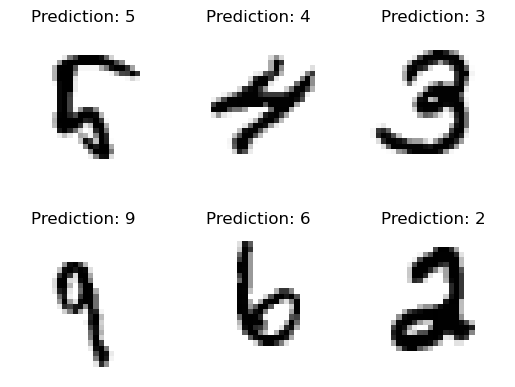

In [8]:
j = 1

for i in np.random.choice(np.arange(0, len(y_test)), size=6):
    img = X_test[i] 
    
    # Redimensionnement de l'image
    img = img.reshape(28, 28)
    
    # Sélection de la sous-figure
    plt.subplot(2, 3, j)
    j = j + 1
    
    # Suppression des axes
    plt.axis('off')
    
    # Affichage de l'image en niveaux de gris
    plt.imshow(img, cmap = cm.binary)
    plt.title('Prediction: ' + str(test_pred[i]))


# Conclusion
-	Une image peut être redimensionnée sous forme de vecteur pour être traitée par des algorithmes classiques, comme ici pour un problème de classification. 
-	Les algorithmes ‘classiques’ de machine learning fonctionnent bien sur des images de base qualité qui contienne peu d’informations
